# Wine Quality Classification

### Objective

The objective for this project is to classify the quality of wine based on its physicochemical properties.

### Dataset description
The dataset is called Wine Quality, which is found on the UCI Machine Learning Repository. The link to the dataset is [here](https://archive.ics.uci.edu/dataset/186/wine+quality).  
There are 11 features, all of them are continuous variables. The target variable is called `quality`

### Data preprocessing
All preprocessing steps done to the data is on `data-preprocessing.ipynb`

The raw dataset contains two csv files: one for red wine and the other for white wine. The first five rows of each file are shown below:

In [1]:
import pandas as pd

In [2]:
red_wine_raw = pd.read_csv("../data/raw/winequality-red.csv", delimiter=";")
red_wine_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white_wine_raw = pd.read_csv("../data/raw/winequality-white.csv", delimiter=";")
white_wine_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The cleaned file is called `winequality_cleaned.csv`, located in `data/cleaned` directory. The first five rows of cleaned data are shown below:

In [4]:
cleaned = pd.read_csv("../data/cleaned/winequality_cleaned.csv")
cleaned.head()

,is_red_wine,alcohol,density,volatile acidity,chlorides,quality_label
0,1,9.4,0.9978,0.70,0.076,0
1,1,9.8,0.9968,0.88,0.098,0
2,1,9.8,0.9970,0.76,0.092,0
3,1,9.8,0.9980,0.28,0.075,1
4,1,9.4,0.9978,0.66,0.075,0


The cleaned dataset is split into training (`winequality_train.csv`) and testing (`winequality_test.csv`) datasets using a 80/20 split. 

### Model construction
The models chosen for this project are: Logistic regression, Support Vector Machine(with linear, rbf, and poly kernels), Linear Discriminant Analysis, and Classification Decision Tree.  
All functions used to run the models above are in `model.py`

In [5]:
%load_ext autoreload
%autoreload 2
import model

In [6]:
train = pd.read_csv("../data/cleaned/winequality_train.csv")
X_train = train.drop(columns="quality_label")
y_train = train["quality_label"]

test = pd.read_csv("../data/cleaned/winequality_test.csv")
X_test = test.drop(columns="quality_label")
y_test = test["quality_label"]

We first run each model without any feature scaling or hyperparameter tuning. For SVM, this means we are using cost = 1, gamma = 1, and degree = 2(for polynomial basis kernel)

In [7]:
model.run_logistic_regression(X_train, X_test, y_train, y_test)

Average cross-validation score: 0.7351966479645597
Accuracy score: 0.7293233082706767


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [8]:
model.run_svm(X_train, X_test, y_train, y_test, kernel='linear')

Average cross-validation score: 0.7354305622217442
Accuracy score: 0.7274436090225563


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [9]:
model.run_svm(X_train, X_test, y_train, y_test, kernel='rbf')

Average cross-validation score: 0.7257970462808185
Accuracy score: 0.7368421052631579


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [10]:
model.run_svm(X_train, X_test, y_train, y_test, kernel='poly')

Average cross-validation score: 0.73613561510071
Accuracy score: 0.7396616541353384


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",2
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [11]:
model.run_lda(X_train, X_test, y_train, y_test)

Average cross-validation score: 0.7401303630636148
Accuracy score: 0.7387218045112782


,"solver solver: {'svd', 'lsqr', 'eigen'}, default='svd'Solver to use, possible values: - 'svd': Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features. - 'lsqr': Least squares solution. Can be combined with shrinkage or custom covariance estimator. - 'eigen': Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator... versionchanged:: 1.2 `solver=""svd""` now has experimental Array API support. See the :ref:`Array API User Guide ` for more details.",'svd'
,"shrinkage shrinkage: 'auto' or float, default=NoneShrinkage parameter, possible values: - None: no shrinkage (default). - 'auto': automatic shrinkage using the Ledoit-Wolf lemma. - float between 0 and 1: fixed shrinkage parameter.This should be left to None if `covariance_estimator` is used.Note that shrinkage works only with 'lsqr' and 'eigen' solvers.For a usage example, see:ref:`sphx_glr_auto_examples_classification_plot_lda.py`.",None
,"priors priors: array-like of shape (n_classes,), default=NoneThe class prior probabilities. By default, the class proportions areinferred from the training data.",None
,"n_components n_components: int, default=NoneNumber of components (<= min(n_classes - 1, n_features)) fordimensionality reduction. If None, will be set tomin(n_classes - 1, n_features). This parameter only affects the`transform` method.For a usage example, see:ref:`sphx_glr_auto_examples_decomposition_plot_pca_vs_lda.py`.",1
,"store_covariance store_covariance: bool, default=FalseIf True, explicitly compute the weighted within-class covariancematrix when solver is 'svd'. The matrix is always computedand stored for the other solvers... versionadded:: 0.17",False
,"tol tol: float, default=1.0e-4Absolute threshold for a singular value of X to be consideredsignificant, used to estimate the rank of X. Dimensions whosesingular values are non-significant are discarded. Only used ifsolver is 'svd'... versionadded:: 0.17",0.0001
,"covariance_estimator covariance_estimator: covariance estimator, default=NoneIf not None, `covariance_estimator` is used to estimatethe covariance matrices instead of relying on the empiricalcovariance estimator (with potential shrinkage).The object should have a fit method and a ``covariance_`` attributelike the estimators in :mod:`sklearn.covariance`.if None the shrinkage parameter drives the estimate.This should be left to None if `shrinkage` is used.Note that `covariance_estimator` works only with 'lsqr' and 'eigen'solvers... versionadded:: 0.24",None


In [12]:
model.run_classification_tree(X_train, X_test, y_train, y_test)

Average cross-validation score: 0.6762199125028274
Accuracy score: 0.6663533834586466


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

#### Hyperparameter tuning

##### Logistic regression: We tune the cost and L1 ratio hyperparameters.

In [13]:
tuned_logistic = model.tune_logistic_regression(X_train, y_train)

accuracy_score = tuned_logistic.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'logistic__C': 0.1, 'logistic__l1_ratio': 0.75}
Accuracy score: 0.7387218045112782


The accuracy improves from 0.729 to 0.739, which is 1%.

##### SVM: We tune the cost, gamma, and degree hyperparameters.

Linear kernel

In [14]:
tuned_linear = model.tune_svm(X_train, y_train, kernel='linear', c=[0.001, 0.01, 0.1, 1, 5, 10, 100], gamma=[0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4])

accuracy_score = tuned_linear.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for linear kernel: {'svm__gamma': 0.1, 'svm__C': 0.1}
Accuracy score: 0.7359022556390977


We now do a more focused search around c=0.1, and gamma=0.1

In [15]:
from scipy.stats import loguniform

tuned_linear_2 = model.tune_svm(X_train, y_train, kernel='linear', c=loguniform(0.01, 1), gamma=loguniform(0.01, 1))

accuracy_score = tuned_linear_2.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for linear kernel: {'svm__C': np.float64(0.15696396388661144), 'svm__gamma': np.float64(0.697828126512603)}
Accuracy score: 0.7349624060150376


The performance dropped slightly compared to the last search. However, both tunings show improvement (from 0.727 to 0.735/0.736)

Now we tune rbf kernel

In [16]:
tuned_rbf = model.tune_svm(X_train, y_train, kernel='rbf', c=[0.001, 0.01, 0.1, 1, 5, 10, 100], gamma=[0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4])

accuracy_score = tuned_rbf.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for rbf kernel: {'svm__gamma': 0.1, 'svm__C': 1}
Accuracy score: 0.7481203007518797


We now do a more focused search around c=1, and gamma=0.1

In [17]:
tuned_rbf_2 = model.tune_svm(X_train, y_train, kernel='rbf', c=loguniform(0.1, 10), gamma=loguniform(0.01, 1))

accuracy_score = tuned_rbf_2.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for rbf kernel: {'svm__C': np.float64(1.5930522616241019), 'svm__gamma': np.float64(0.2607024758370766)}
Accuracy score: 0.7528195488721805


The more focused search demonstrated almost 2% improvement in accuracy score than before (from 0.737 to 0.753)

Finally we tune poly kernel

In [ ]:
tuned_poly = model.tune_svm(X_train, y_train, kernel='poly', c=[0.1, 1, 5, 10, 100], gamma=[0.1, 1, 2, 3], degree=[2, 3], n_iter=15)

test_score = tuned_poly.score(X_test, y_test)
print("Accuracy score:", test_score)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.2s
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.2s
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.2s
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.2s
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.3s
[CV] END ..............svm__C=5, svm__degree=2, svm__gamma=3; total time=  10.9s
[CV] END ..............svm__C=5, svm__degree=2, svm__gamma=3; total time=  13.7s
[CV] END .............svm__C=10, svm__degree=2, svm__gamma=2; total time=  13.6s
[CV] END .............svm__C=10, svm__degree=2, svm__gamma=2; total time=  17.7s
[CV] END ..............svm__C=5, svm__degree=2, svm__gamma=3; total time=  53.4s
[CV] END ..............svm__C=5, svm__degree=2, svm__gamma=3; total time=  53.6s
[CV] END ..........svm__C=0.1, svm__degree=3, sv

The accuracy given here is worse than the model without tuning. We now try to do a more focused search around the original hyperparameters (c=1, gamma=1, degree=2)

In [18]:
tuned_poly_2 = model.tune_svm(X_train, y_train, kernel='poly', c=loguniform(0.1, 5), gamma=loguniform(0.1, 3), degree=[2])

test_score = tuned_poly_2.score(X_test, y_test)
print("Accuracy score:", test_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for poly kernel: {'svm__C': np.float64(4.370990468130501), 'svm__degree': 2, 'svm__gamma': np.float64(1.5635108708133456)}
Accuracy score: 0.6710526315789473


The focused search using log-uniform around the previously promising hyperparameters (C=1, gamma=1, degree=2) resulted in lower accuracy on the test set. Therefore, the manually tuned parameters (C=1, gamma=1, degree=2) remain the best choice.

##### LDA: We try using different solvers.

In [19]:
tuned_lda = model.tune_lda(X_train, y_train)

accuracy_score = tuned_lda.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Best parameters: {'lda__solver': 'svd'}
Accuracy score: 0.7387218045112782


The accuracy score is the same as before, suggesting that the default parameters result in the best accuracy.

##### Classification Tree: We tune the maximum depth, minimum samples for splitting, minimum samples required to be at a leaf node, and the criterion hyperparameters.

In [20]:
tuned_tree = model.tune_classification_tree(X_train, y_train)

accuracy_score = tuned_tree.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 6, 'criterion': 'entropy'}
Best CV score: 0.73
Accuracy score: 0.7293233082706767


The accuracy score improved by 6.2% (from 0.667 to 0.729). Below is the visualization of the tree:

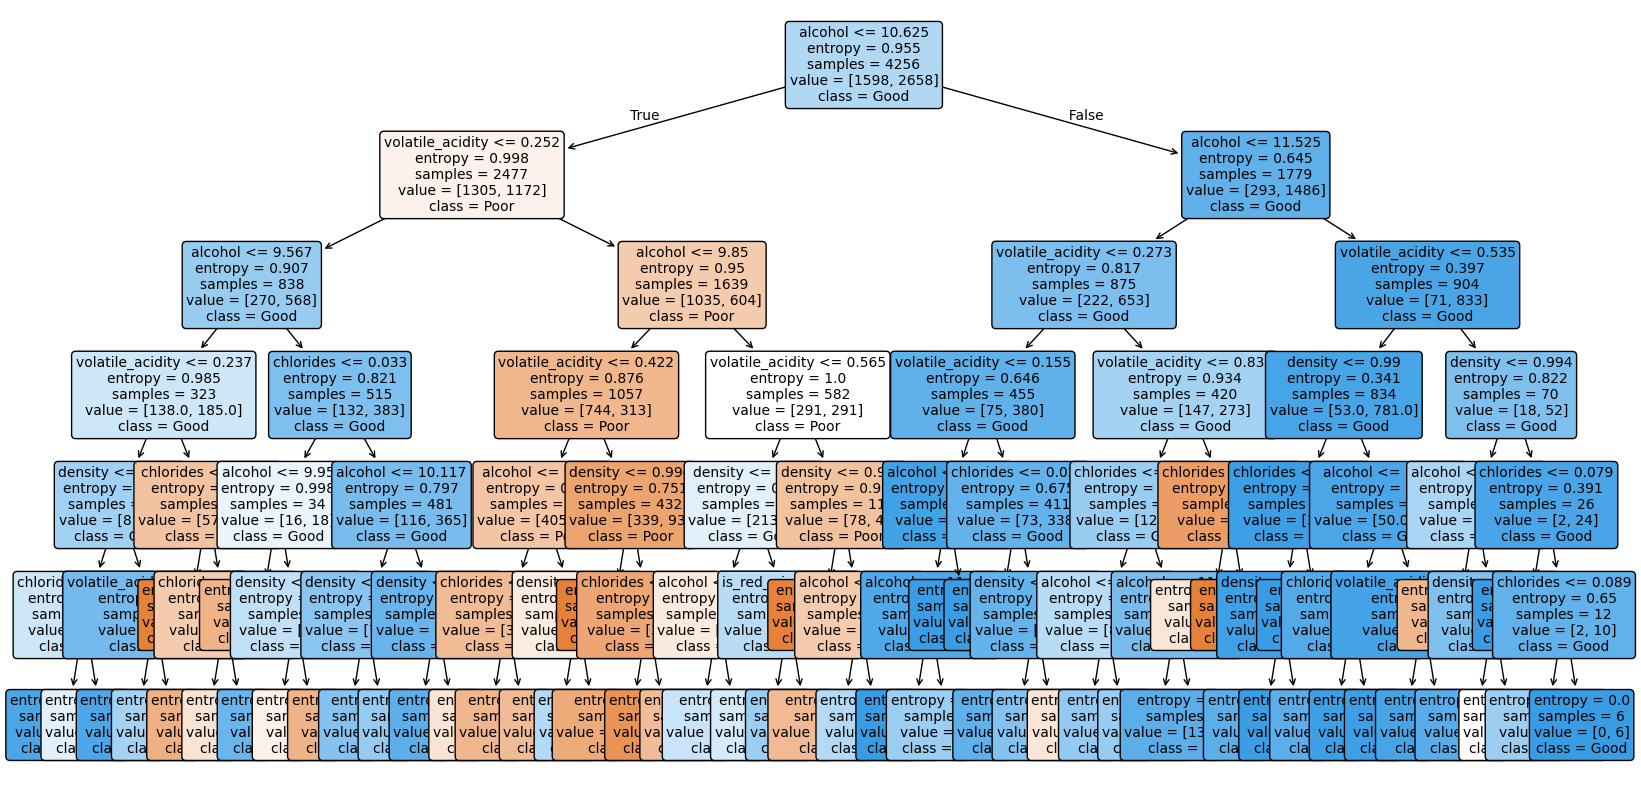

In [21]:
model.show_tree(tuned_tree)

### Result

Of all the models we tuned, here is the rank of performance:  
1. SVM (rbf): 0.753  
2. SVM (poly): 0.740
3. Logistic Regression/LDA: 0.739
4. SVM (linear): 0.736
5. Classification Tree: 0.729

#### Visualization
Functions for generating the visuals below are mostly in `visualization.py`

In [22]:
import visualization

In [ ]:
svm_linear = tuned_linear
svm_rbf = tuned_rbf_2
svm_poly = model.run_svm(X_train, X_test, y_train, y_test, kernel='poly')
logistic = tuned_logistic
lda = tuned_lda
classification_tree = tuned_tree

##### Accuracy Bar Chart

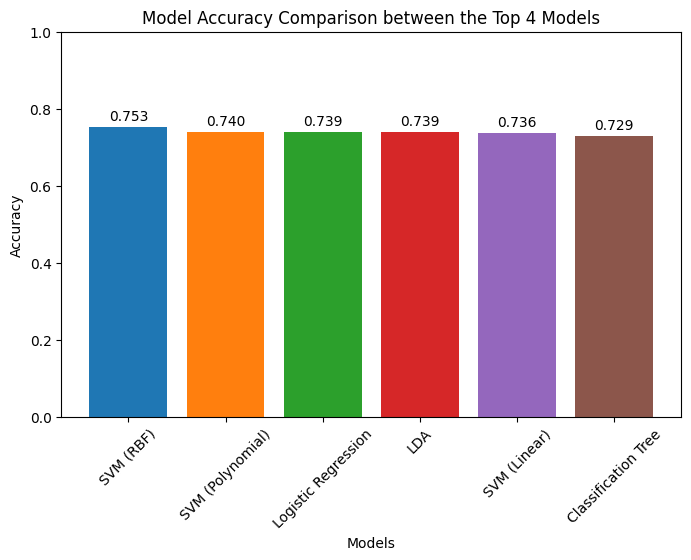

In [24]:
models = [svm_rbf, svm_poly, logistic, lda, svm_linear, classification_tree]
names = ["SVM (RBF)", "SVM (Polynomial)", "Logistic Regression", "LDA", "SVM (Linear)", "Classification Tree"]

visualization.plot_accuracy_chart(models, names, X_test, y_test)

##### Classification Report

In [25]:
models = [svm_rbf, svm_poly, logistic, lda, svm_linear, classification_tree]
names = ["SVM (RBF)", "SVM (Polynomial)", "Logistic Regression", "LDA", "SVM (Linear)", "Classification Tree"]

model.print_classification_report(models, names, X_test, y_test)

Classification Report for SVM (RBF):
              precision    recall  f1-score   support

      0=Poor       0.68      0.62      0.65       390
      1=Good       0.79      0.83      0.81       674

    accuracy                           0.75      1064
   macro avg       0.73      0.72      0.73      1064
weighted avg       0.75      0.75      0.75      1064

Classification Report for SVM (Polynomial):
              precision    recall  f1-score   support

      0=Poor       0.66      0.59      0.63       390
      1=Good       0.78      0.82      0.80       674

    accuracy                           0.74      1064
   macro avg       0.72      0.71      0.71      1064
weighted avg       0.74      0.74      0.74      1064

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      0=Poor       0.66      0.58      0.62       390
      1=Good       0.77      0.83      0.80       674

    accuracy                           0.74      1064


##### Confusion matrices

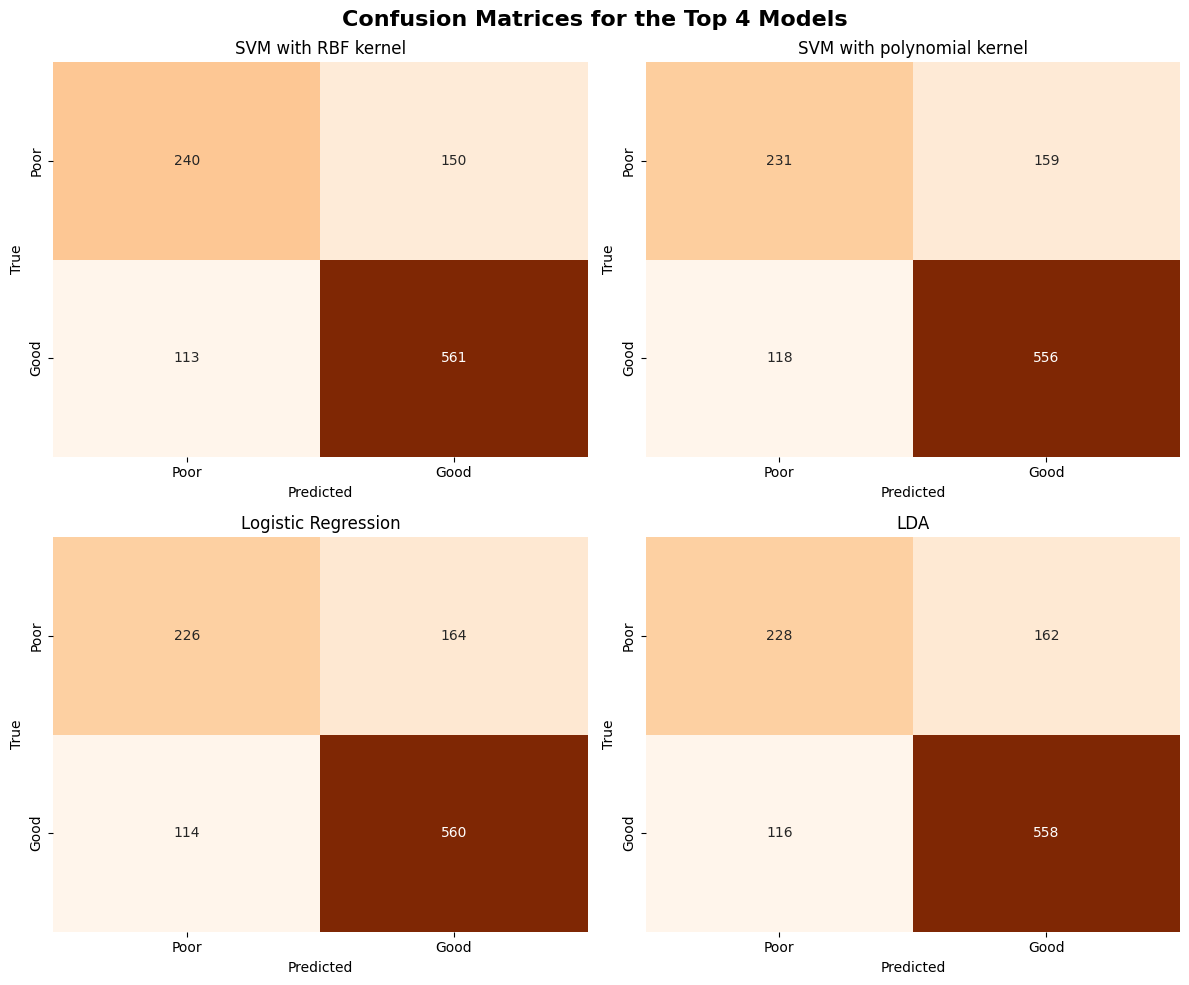

In [26]:
models = [svm_rbf, svm_poly, logistic, lda]
names = ["SVM with RBF kernel", "SVM with polynomial kernel", "Logistic Regression", "LDA"]

visualization.plot_confusion_matrices(models, names, X_test, y_test)

##### Learning Curve

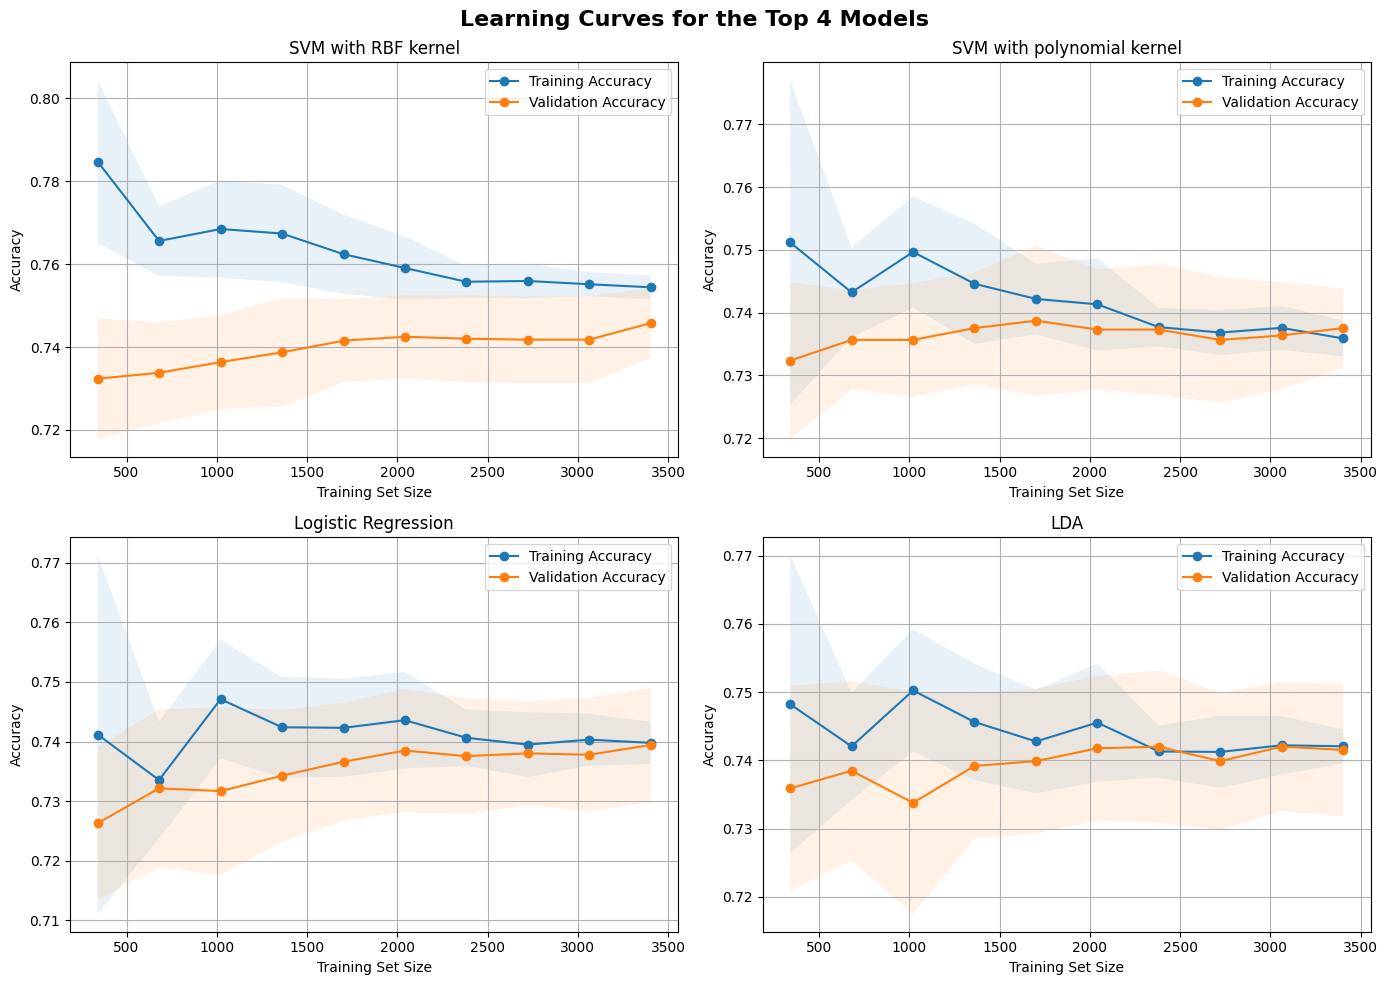

In [27]:
models = [svm_rbf, svm_poly, logistic, lda]
names = ["SVM with RBF kernel", "SVM with polynomial kernel", "Logistic Regression", "LDA"]

visualization.plot_learning_curves(models, names, X_train, y_train)

##### ROC Curve

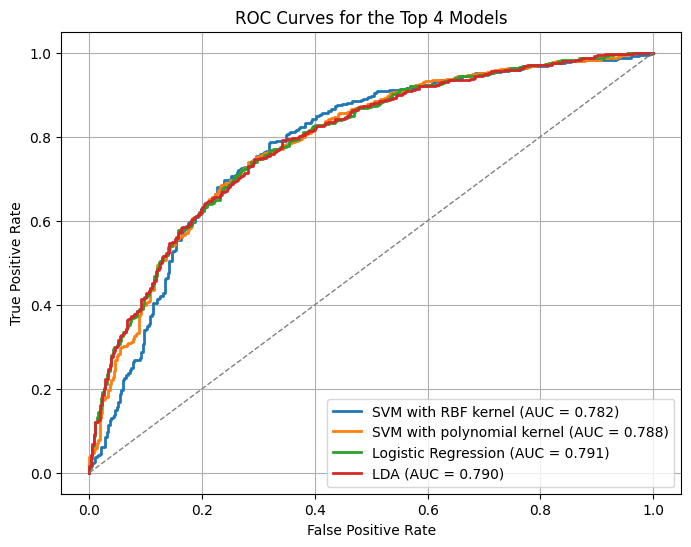

In [28]:
models = [svm_rbf, svm_poly, logistic, lda]
names = ["SVM with RBF kernel", "SVM with polynomial kernel", "Logistic Regression", "LDA"]
visualization.plot_roc_curves(models, names, X_test, y_test)

#### Analysis